In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Generative Adversarial Network (GAN) Framework

Generative Adversarial Networks (GANs) have emerged as a powerful framework for learning generative models of complex data distributions. GANs play an adversarial game with two linked models: the Generative Model and the Discriminative Model. The basic structure of GANs is shown in the following figure:

$$
\begin{array}{c}
\text{Generator} \\
\text{Synthetic data} \\
G \\
G(z) \\
\downarrow \\
\text{Discriminator} \\
D \\
\text{True / Fake} \\
\end{array}
$$

- **Generator**: The generator \( G \) uses random noise \( z \) to generate synthetic data \( \hat{x} = G(z) \).
- **Discriminator**: The discriminator \( D \) tries to identify whether the synthesized data \( \hat{x} \) is real or fake.

In this setup, the generator and the discriminator are closely connected, which is the essence of Goodfellow’s GANs. The generator aims to produce data that is indistinguishable from real data, while the discriminator tries to differentiate between real and synthetic data.

The framework of GANs is as follows:

- **Generator**: Defined by a differentiable function \( G \) that takes \( z \) as input and uses parameters \( \theta_G \). When \( z \) is sampled from some simple prior distribution, \( G(z) = G(z; \theta) \) yields samples \( x_i \) drawn from the model distribution \( P_{model} = P_G \). The generator's objective is to find the maximum likelihood estimate of \( \theta_G \) as follows:

$$
\theta^*_G = \arg \max_{\theta} \sum_{i=1}^m \log P_G(x_i; \theta)
$$

Approximating the expectation:

$$
\theta^*_G = \arg \max_{\theta} \mathbb{E}_{x \sim P_{data}}[\log P_G(x; \theta)]
$$

Breaking it down:

$$
\theta^*_G = \arg \max_{\theta} \left( \int_{x} P_{data}(x) \log P_G(x; \theta) \, dx - \int_{x} P_{data}(x) \log P_{data}(x) \, dx \right)
$$

Since the second term is independent of \( \theta \):

$$
\theta^*_G = \arg \max_{\theta} \int_{x} P_{data}(x) \log P_G(x; \theta) \, dx - \text{constant}
$$

Therefore, the optimization can be framed as minimizing the Kullback-Leibler (KL) divergence between \( P_{data} \) and \( P_G \):

$$
\theta^*_G = \arg \min_{\theta} \text{KL}(P_{data}(x) \| P_G(x; \theta))
$$


The generator \( G \) in a GAN aims to maximize the likelihood of generating data that resembles the true data distribution. The objective function for the generator is formulated as follows:

$$
\theta^*_G = \arg \max_{\theta} \sum_{i=1}^m \log P_G(x_i; \theta)
$$

Approximating the expectation:

$$
\theta^*_G = \arg \max_{\theta} \mathbb{E}_{x \sim P_{data}}[\log P_G(x; \theta)]
$$

Breaking it down:

$$
\theta^*_G = \arg \max_{\theta} \left( \int_{x} P_{data}(x) \log P_G(x; \theta) \, dx - \int_{x} P_{data}(x) \log P_{data}(x) \, dx \right)
$$

Since the second term is independent of \( \theta \), it simplifies to:

$$
\theta^*_G = \arg \max_{\theta} \int_{x} P_{data}(x) \log P_G(x; \theta) \, dx - \text{constant}
$$

Therefore, the optimization can be framed as minimizing the Kullback-Leibler (KL) divergence between \( P_{data} \) and \( P_G \):

$$
\theta^*_G = \arg \min_{\theta} \text{KL}(P_{data}(x) \| P_G(x; \theta))
$$


### Generative Adversarial Network Framework

The Generative Adversarial Network (GAN) consists of two models:
- **Generator \( G \)**: Tries to create data samples from a random noise \( z \), aiming to make them indistinguishable from real data.
- **Discriminator \( D \)**: Tries to distinguish between real data samples and those generated by \( G \).

The generator can be thought of as a counterfeiter trying to make fake money, while the discriminator acts as the police trying to detect counterfeit money.

#### GAN Framework

The generator \( G \) aims to fool the discriminator by producing samples that closely resemble real data. The optimization problem for the generator can be framed as follows:

$$
\theta^*_G = \arg \max_{\theta} \sum_{i=1}^m \log P_G(x_i; \theta)
$$

Approximating the expectation:

$$
\theta^*_G = \arg \max_{\theta} \mathbb{E}_{x \sim P_{data}}[\log P_G(x; \theta)]
$$

Rewriting it:

$$
\theta^*_G = \arg \max_{\theta} \left( \int_{x} P_{data}(x) \log P_G(x; \theta) \, dx - \int_{x} P_{data}(x) \log P_{data}(x) \, dx \right)
$$

Since the second term is independent of \( \theta \), this simplifies to:

$$
\theta^*_G = \arg \max_{\theta} \int_{x} P_{data}(x) \log P_G(x; \theta) \, dx - \text{constant}
$$

Thus, the generator minimizes the Kullback-Leibler (KL) divergence:

$$
\theta^*_G = \arg \min_{\theta} \text{KL}(P_{data}(x) \| P_G(x; \theta))
$$

#### Optimal Discriminator

For a fixed generator \( G \), the optimal discriminator \( D^*_G(x) \) is given by:

$$
D^*_G(x) = \frac{P_{data}(x)}{P_{data}(x) + P_G(x; \theta)}
$$

The discriminator is trained to maximize the log-probability of correctly classifying real data, while the generator is trained to minimize the log-probability of the discriminator being mistaken:

$$
\min_G \max_D V(D, G) = \mathbb{E}_{x \sim P_{data}(x)} [\log D(x)] + \mathbb{E}_{z \sim P_z(z)} [\log (1 - D(G(z)))]
$$

#### Minibatch Stochastic Gradient Descent Training of GANs

Algorithm 7.12 for minibatch stochastic gradient descent training:

1. **Input**: The number \( k \) of steps to apply to the discriminator.
2. **For** number of training iterations do:
   1. **For** \( k \) steps do:
      1. Sample a mini-batch of \( m \) noise samples \( \{z_1, \ldots, z_m\} \) from noise prior \( P_z(z) \).
      2. Sample a mini-batch of \( m \) examples \( \{x_1, \ldots, x_m\} \) from the data generating distribution \( P_{data}(x) \).
      3. Update the discriminator by ascending its stochastic gradient:
      $$
      \nabla_{\theta_D} \frac{1}{m} \sum_{i=1}^m \left[\log D(x_i) + \log (1 - D(G(z_i)))\right]
      $$
   2. Sample a mini-batch of \( m \) noise samples \( \{z_1, \ldots, z_m\} \) from noise prior \( P_z(z) \).
   3. Update the generator by descending its stochastic gradient:
   $$
   \nabla_{\theta_G} \frac{1}{m} \sum_{i=1}^m \log (1 - D(G(z_i)))
   $$
3. **End for**

#### Reformulation of the Minimax Game

The discriminator's objective function can be interpreted as:

$$
C(G) = \mathbb{E}_{x \sim P_{data}(x)} \left[ \log \frac{P_{data}(x)}{P_{data}(x) + P_G(x; \theta)} \right] + \mathbb{E}_{x \sim P_G(x; \theta)} \left[ \log \frac{P_{data}(x)}{P_{data}(x) + P_G(x; \theta)} \right]
$$

Thus, the minimax game can be reformulated as:

$$
\min_G C(G) = \min_G \max_D V(D, G)
$$


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, Flatten, Reshape
from tensorflow.keras.models import Sequential

# Define the generator model
def build_generator():
    model = Sequential([
        Dense(128, input_dim=100),
        LeakyReLU(alpha=0.2),
        Dense(784, activation='sigmoid'),
        Reshape((28, 28, 1))
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    model = Sequential([
        generator,
        discriminator
    ])
    return model

# Loss functions and optimizers
def compile_models(generator, discriminator, gan):
    discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    discriminator.trainable = False
    gan.compile(loss='binary_crossentropy', optimizer='adam')

# Training function
def train_gan(generator, discriminator, gan, epochs, batch_size, noise_dim):
    (x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    x_train = (x_train / 127.5) - 1.0  # Normalize to [-1, 1]
    x_train = np.expand_dims(x_train, axis=-1)

    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_imgs = x_train[idx]
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        fake_imgs = generator.predict(noise)
        
        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        print(f"{epoch}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

# Parameters
noise_dim = 100
epochs = 100
batch_size = 64

# Initialize models
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Compile models
compile_models(generator, discriminator, gan)

# Train the GAN
train_gan(generator, discriminator, gan, epochs, batch_size, noise_dim)


2/2 [==============================] - 6s 3ms/step
0/100 [D loss: 0.5023618713021278 | D accuracy: 59.375] [G loss: 5.665816307067871]
2/2 [==============================] - 0s 5ms/step
1/100 [D loss: 0.0008865520940162241 | D accuracy: 100.0] [G loss: 8.528217315673828]
2/2 [==============================] - 0s 5ms/step
2/100 [D loss: 4.967133645550348e-05 | D accuracy: 100.0] [G loss: 10.451444625854492]
2/2 [==============================] - 0s 5ms/step
3/100 [D loss: 8.892960750017664e-06 | D accuracy: 100.0] [G loss: 11.859798431396484]
2/2 [==============================] - 0s 7ms/step
4/100 [D loss: 2.5628761690654756e-06 | D accuracy: 100.0] [G loss: 12.795978546142578]
2/2 [==============================] - 0s 4ms/step
5/100 [D loss: 1.2066299692747862e-06 | D accuracy: 100.0] [G loss: 13.540592193603516]
2/2 [==============================] - 0s 5ms/step
6/100 [D loss: 6.238304770533887e-07 | D accuracy: 100.0] [G loss: 14.012605667114258]
2/2 [==============================]

In [3]:
import numpy as np

# Helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

# Define the generator model
class Generator:
    def __init__(self, input_dim, output_dim):
        # Initialize weights and biases
        self.weights = np.random.randn(input_dim, output_dim) * 0.01
        self.biases = np.zeros((1, output_dim))

    def forward(self, z):
        return tanh(np.dot(z, self.weights) + self.biases)

# Define the discriminator model
class Discriminator:
    def __init__(self, input_dim):
        # Initialize weights and biases
        self.weights = np.random.randn(input_dim, 1) * 0.01
        self.biases = np.zeros((1, 1))

    def forward(self, x):
        return sigmoid(np.dot(x, self.weights) + self.biases)

# Training function
def train_gan(generator, discriminator, data, epochs, batch_size, noise_dim, learning_rate):
    for epoch in range(epochs):
        # Generate fake data
        z = np.random.randn(batch_size, noise_dim)
        fake_data = generator.forward(z)

        # Train discriminator
        real_data = data[np.random.randint(0, data.shape[0], batch_size)]
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        real_output = discriminator.forward(real_data)
        fake_output = discriminator.forward(fake_data)

        # Discriminator loss and gradients
        d_loss_real = -np.mean(np.log(real_output))
        d_loss_fake = -np.mean(np.log(1 - fake_output))
        d_loss = d_loss_real + d_loss_fake

        # Compute gradients for discriminator
        d_loss_grad = (real_output - 1) + fake_output

        # Update discriminator weights and biases
        discriminator.weights -= learning_rate * np.dot(real_data.T, d_loss_grad)
        discriminator.biases -= learning_rate * np.sum(d_loss_grad, axis=0, keepdims=True)

        # Train generator
        z = np.random.randn(batch_size, noise_dim)
        fake_data = generator.forward(z)
        fake_output = discriminator.forward(fake_data)

        # Generator loss and gradients
        g_loss = -np.mean(np.log(fake_output))

        # Compute gradients for generator
        g_loss_grad = fake_output - 1

        # Update generator weights and biases
        generator.weights -= learning_rate * np.dot(z.T, g_loss_grad)
        generator.biases -= learning_rate * np.sum(g_loss_grad, axis=0, keepdims=True)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}/{epochs} | Discriminator Loss: {d_loss} | Generator Loss: {g_loss}')

# Parameters
noise_dim = 100
data_dim = 784  # Example for flattened 28x28 images
epochs = 10000
batch_size = 64
learning_rate = 0.001

# Dummy data (e.g., flattened MNIST images)
data = np.random.randn(1000, data_dim)

# Initialize models
generator = Generator(noise_dim, data_dim)
discriminator = Discriminator(data_dim)

# Train the GAN
train_gan(generator, discriminator, data, epochs, batch_size, noise_dim, learning_rate)


Epoch 0/10000 | Discriminator Loss: 1.3673646854152155 | Generator Loss: 0.6932898828521699
Epoch 100/10000 | Discriminator Loss: 1.3863426289182454 | Generator Loss: 0.6955398039142306
Epoch 200/10000 | Discriminator Loss: 1.3783276357677972 | Generator Loss: 0.7009244783068874
Epoch 300/10000 | Discriminator Loss: 1.379064041800909 | Generator Loss: 0.6987808019030556
Epoch 400/10000 | Discriminator Loss: 1.382616607067742 | Generator Loss: 0.6939111065566943
Epoch 500/10000 | Discriminator Loss: 1.3834139887791221 | Generator Loss: 0.6932189390109719
Epoch 600/10000 | Discriminator Loss: 1.381148982407292 | Generator Loss: 0.6958987669706982
Epoch 700/10000 | Discriminator Loss: 1.3788100738107207 | Generator Loss: 0.696440820104006
Epoch 800/10000 | Discriminator Loss: 1.3801858197509445 | Generator Loss: 0.6961199354629051
Epoch 900/10000 | Discriminator Loss: 1.3839849690700843 | Generator Loss: 0.6943145966406559
Epoch 1000/10000 | Discriminator Loss: 1.3870631929239496 | Genera

Epoch 8700/10000 | Discriminator Loss: 1.385821536507457 | Generator Loss: 0.6933942298497333
Epoch 8800/10000 | Discriminator Loss: 1.3858537043669987 | Generator Loss: 0.6933780314761407
Epoch 8900/10000 | Discriminator Loss: 1.3858062939261888 | Generator Loss: 0.6933862499799917
Epoch 9000/10000 | Discriminator Loss: 1.3858925350862403 | Generator Loss: 0.693347712824054
Epoch 9100/10000 | Discriminator Loss: 1.385866436734107 | Generator Loss: 0.6933646168820407
Epoch 9200/10000 | Discriminator Loss: 1.3859031626077098 | Generator Loss: 0.6933515764988605
Epoch 9300/10000 | Discriminator Loss: 1.3859430504160697 | Generator Loss: 0.6933352199500638
Epoch 9400/10000 | Discriminator Loss: 1.3859948600944048 | Generator Loss: 0.6932986160931486
Epoch 9500/10000 | Discriminator Loss: 1.386018808446156 | Generator Loss: 0.6933077812304953
Epoch 9600/10000 | Discriminator Loss: 1.386058755332531 | Generator Loss: 0.6932564145421748
Epoch 9700/10000 | Discriminator Loss: 1.38593967450446

## Bidirectional Generative Adversarial Networks (BiGANs)

The Generative Adversarial Network (GAN) framework traditionally focuses on learning the mapping from a latent space to a data space. However, many applications benefit from learning both the forward mapping (latent to data) and the inverse mapping (data to latent). Bidirectional Generative Adversarial Networks (BiGANs) address this by introducing an encoder to complement the traditional generator and discriminator.

### Overview

In a standard GAN, the setup consists of:

- **Generator \(G\)**: Maps latent samples \(z\) to generated data \(G(z)\).
- **Discriminator \(D\)**: Distinguishes between real data and generated data.
  
BiGAN extends this by adding an **Encoder \(E\)** that maps data \(x\) back to the latent space \(E(x)\). The BiGAN framework includes:

1. **Generator \(G\)**: Maps latent samples \(z\) to generated data \(G(z)\).
2. **Encoder \(E\)**: Maps data \(x\) to latent space \(E(x)\).
3. **Discriminator \(D\)**: Discriminates between:
   - The tuple \((G(z), z)\), which is the generated data and its corresponding latent code.
   - The tuple \((x, E(x))\), which is the real data and its encoded latent representation.

The discriminator thus learns to distinguish between these tuples in both data and latent spaces.

### BiGAN Objective

The BiGAN framework trains the generator \(G\) and encoder \(E\) in a minimax game against the discriminator \(D\). The training objective is formulated as:

$$
\min_{G, E} \max_{D} V(G, E, D) = \mathbb{E}_{x \sim P_x} \left[ \mathbb{E}_{z \sim P_E(\cdot|x)} \left[ \log D(x, E(x)) \right] \right]
+ \mathbb{E}_{z \sim P_z} \left[ \mathbb{E}_{x \sim P_G(\cdot|z)} \left[ \log \left(1 - D(G(z), z) \right) \right] \right]
$$

where:
- \(P_x\) is the data distribution.
- \(P_z\) is the prior distribution over latent variables.
- \(P_E(\cdot|x)\) is the conditional distribution of \(z\) given \(x\).
- \(P_G(\cdot|z)\) is the distribution of \(x\) given \(z\).

### Generalized BiGAN Objective

In some scenarios, it is beneficial to work with different spaces for the generator and encoder. We can generalize the BiGAN objective with functions \(g(x)\) and \(g(z)\) that map the data and latent spaces to alternative spaces \(x^\prime\) and \(z^\prime\). The generalized objective becomes:

$$
V(G, E, D) = \mathbb{E}_{x \sim P_x} \left[ \mathbb{E}_{z^\prime \sim P_E(\cdot|x)} \left[ \log D(g(x), z^\prime) \right] \right]
+ \mathbb{E}_{z \sim P_z} \left[ \mathbb{E}_{x^\prime \sim P_G(\cdot|z)} \left[ \log \left(1 - D(x^\prime, g(z)) \right) \right] \right]
$$

where:
- \(g(x): x \rightarrow x^\prime\) and \(g(z): z \rightarrow z^\prime\) are mappings to alternative spaces.
- \(E: x \rightarrow z^\prime\) and \(G: z \rightarrow x^\prime\) are the generalized encoder and generator, respectively.
- \(D: x^\prime \times z^\prime \rightarrow [0, 1]\) is the generalized discriminator.

This formulation simplifies to the original BiGAN objective when \(g(x) = x\) and \(g(z) = z\).



In [4]:
import numpy as np

# Define the generator
def generator(z, theta_G):
    # Dummy generator: identity function for simplicity
    return z

# Define the encoder
def encoder(x, theta_E):
    # Dummy encoder: identity function for simplicity
    return x

# Define the discriminator
def discriminator(x, z, theta_D):
    # Dummy discriminator: simple heuristic for example
    return np.random.rand()  # Random value for simplicity

# Define the loss functions for GAN
def discriminator_loss(x, z, theta_D):
    # Loss for the discriminator when distinguishing real data
    D_real = discriminator(x, encoder(x, None), theta_D)
    D_fake = discriminator(generator(z, None), z, theta_D)
    loss_D = -np.log(D_real) - np.log(1 - D_fake)
    return loss_D

def generator_loss(z, theta_G, theta_D):
    # Loss for the generator to fool the discriminator
    D_fake = discriminator(generator(z, None), z, theta_D)
    loss_G = -np.log(D_fake)
    return loss_G

# Training loop for BiGAN
def train_bigan(num_iterations, learning_rate):
    # Initialize parameters
    theta_G = np.zeros((1,))  # Dummy initialization
    theta_E = np.zeros((1,))  # Dummy initialization
    theta_D = np.zeros((1,))  # Dummy initialization

    for iteration in range(num_iterations):
        # Sample noise and real data
        z = np.random.randn(1)
        x = np.random.randn(1)
        
        # Compute losses
        loss_D = discriminator_loss(x, z, theta_D)
        loss_G = generator_loss(z, theta_G, theta_D)
        
        # Update parameters (Dummy update step for illustration)
        theta_D -= learning_rate * loss_D
        theta_G -= learning_rate * loss_G

        # Print losses
        print(f"Iteration {iteration}: Discriminator Loss: {loss_D}, Generator Loss: {loss_G}")

# Hyperparameters
num_iterations = 1000
learning_rate = 0.01

# Train the BiGAN
train_bigan(num_iterations, learning_rate)


Iteration 0: Discriminator Loss: 0.8389650232113997, Generator Loss: 0.023077398256270327
Iteration 1: Discriminator Loss: 1.5543132924389131, Generator Loss: 0.4412395210379177
Iteration 2: Discriminator Loss: 0.650138179203201, Generator Loss: 0.5877939679816339
Iteration 3: Discriminator Loss: 2.1062078063828507, Generator Loss: 0.5696365524398422
Iteration 4: Discriminator Loss: 1.6207304982612272, Generator Loss: 0.10754715659936356
Iteration 5: Discriminator Loss: 1.3590042771778212, Generator Loss: 0.17667900768794056
Iteration 6: Discriminator Loss: 0.055383663731513835, Generator Loss: 0.5283620105397226
Iteration 7: Discriminator Loss: 2.6844636285646373, Generator Loss: 0.0037931487281276585
Iteration 8: Discriminator Loss: 1.867410195066205, Generator Loss: 1.3530708375012612
Iteration 9: Discriminator Loss: 1.5430787958828422, Generator Loss: 0.46132076300415
Iteration 10: Discriminator Loss: 1.6514824882250672, Generator Loss: 0.8878177417811494
Iteration 11: Discriminato

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
import numpy as np

# Define the generator
def build_generator():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(100,)),
        Dense(784, activation='sigmoid'),
        Reshape((28, 28, 1))
    ])
    return model

# Define the encoder
def build_encoder():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(256, activation='relu'),
        Dense(100)
    ])
    return model

# Define the discriminator
def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define the BiGAN class
class BiGAN(tf.keras.Model):
    def __init__(self):
        super(BiGAN, self).__init__()
        self.generator = build_generator()
        self.encoder = build_encoder()
        self.discriminator = build_discriminator()

    def call(self, inputs):
        z, x = inputs
        Gz = self.generator(z)
        Ez = self.encoder(x)
        Dx = self.discriminator(x)
        D_Gz = self.discriminator(Gz)
        return Dx, D_Gz, Ez

# Loss functions
def discriminator_loss(real_output, fake_output):
    return tf.keras.losses.binary_crossentropy(tf.ones_like(real_output), real_output) + \
           tf.keras.losses.binary_crossentropy(tf.zeros_like(fake_output), fake_output)

def generator_loss(fake_output):
    return tf.keras.losses.binary_crossentropy(tf.ones_like(fake_output), fake_output)

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
encoder_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training step
@tf.function
def train_step(images, biGAN, batch_size):
    noise = tf.random.normal([batch_size, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as enc_tape, tf.GradientTape() as disc_tape:
        generated_images = biGAN.generator(noise, training=True)
        real_output, fake_output, encoded_data = biGAN((generated_images, images), training=True)

        disc_loss = discriminator_loss(real_output, fake_output)
        gen_loss = generator_loss(fake_output)
        # Encoder loss could be added here depending on the specific formulation

    gradients_of_generator = gen_tape.gradient(gen_loss, biGAN.generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, biGAN.discriminator.trainable_variables)
    gradients_of_encoder = enc_tape.gradient(enc_loss, biGAN.encoder.trainable_variables)  # Define enc_loss

    generator_optimizer.apply_gradients(zip(gradients_of_generator, biGAN.generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, biGAN.discriminator.trainable_variables))
    encoder_optimizer.apply_gradients(zip(gradients_of_encoder, biGAN.encoder.trainable_variables))  # Apply encoder gradients

# Training loop
def train(dataset, epochs):
    biGAN = BiGAN()

    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch, biGAN, batch_size=64)

        print(f"Epoch {epoch + 1} completed")

# Load dataset (example with MNIST)
mnist = tf.keras.datasets.mnist
(x_train, _), (_, _) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(64)

# Start training
train(dataset, epochs=10)


2024-08-24 23:47:47.407359: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2024-08-24 23:47:47.922758: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


ValueError: in user code:

    File "/tmp/ipykernel_12968/1325297434.py", line 69, in train_step  *
        real_output, fake_output, encoded_data = biGAN((generated_images, images), training=True)
    File "/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filerc58268p.py", line 11, in tf__call
        Gz = ag__.converted_call(ag__.ld(self).generator, (ag__.ld(z),), None, fscope)

    ValueError: Exception encountered when calling layer "bi_gan" "                 f"(type BiGAN).
    
    in user code:
    
        File "/tmp/ipykernel_12968/1325297434.py", line 43, in call  *
            Gz = self.generator(z)
        File "/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/keras/engine/input_spec.py", line 296, in assert_input_compatibility
            f'Input {input_index} of layer "{layer_name}" is '
    
        ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 100), found shape=(64, 28, 28, 1)
    
    
    Call arguments received by layer "bi_gan" "                 f"(type BiGAN):
      • inputs=('tf.Tensor(shape=(64, 28, 28, 1), dtype=float32)', 'tf.Tensor(shape=(64, 28, 28, 1), dtype=float32)')


In [6]:
import tensorflow as tf
from tensorflow.keras import layers

# Define input shapes
image_shape = (28, 28, 1)
latent_dim = 100

# Encoder: Maps images to the latent space
def build_encoder():
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=image_shape),
        layers.Conv2D(32, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(latent_dim)
    ])
    return model

# Generator: Maps latent vectors to images
def build_generator():
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(latent_dim,)),
        layers.Dense(7*7*128),
        layers.Reshape((7, 7, 128)),
        layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"),
        layers.ReLU(),
        layers.Conv2DTranspose(32, kernel_size=4, strides=2, padding="same"),
        layers.ReLU(),
        layers.Conv2DTranspose(1, kernel_size=7, activation='sigmoid', padding="same")
    ])
    return model

# Discriminator: Takes both image and latent vector tuples (G(z), z) and (x, E(x))
def build_discriminator():
    image_input = layers.Input(shape=image_shape)
    latent_input = layers.Input(shape=(latent_dim,))

    x = layers.Conv2D(32, kernel_size=4, strides=2, padding="same")(image_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Conv2D(64, kernel_size=4, strides=2, padding="same")(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Flatten()(x)

    combined = layers.Concatenate()([x, latent_input])
    combined = layers.Dense(128)(combined)
    combined = layers.LeakyReLU(alpha=0.2)(combined)
    combined = layers.Dense(1, activation='sigmoid')(combined)

    model = tf.keras.Model([image_input, latent_input], combined)
    return model

# Instantiate the models
encoder = build_encoder()
generator = build_generator()
discriminator = build_discriminator()

# Inputs
real_images = layers.Input(shape=image_shape)
latent_vectors = layers.Input(shape=(latent_dim,))

# Generate fake images from latent vectors
fake_images = generator(latent_vectors)

# Encode real images into latent space
encoded_images = encoder(real_images)

# Discriminator outputs
real_disc = discriminator([real_images, encoded_images])
fake_disc = discriminator([fake_images, latent_vectors])

# Define the full BiGAN model
bigan = tf.keras.Model([real_images, latent_vectors], [real_disc, fake_disc])

# Compile the BiGAN model
bigan.compile(optimizer='adam', loss='binary_crossentropy')

# Summary of the model
bigan.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 sequential_9 (Sequential)      (None, 100)          347076      ['input_5[0][0]']                
                                                                                                  
 sequential_10 (Sequential)     (None, 28, 28, 1)    798977      ['input_6[0][0]']                
                                                                                            

# Variational Autoencoders (VAEs)

In the previous sections, we explored two methods for generating data points \( x \) from a noise vector \( z \): **standard GANs** and **BiGANs**. Now, we shift our focus to an alternative method: **Variational Autoencoders (VAEs)**. 

VAEs are called "autoencoders" because the final training objective derived from this setup includes both an encoder and a decoder, resembling a traditional autoencoder [22]. However, unlike traditional autoencoders, VAEs introduce a probabilistic approach to modeling the latent space.

## VAE Architecture

The construction of a VAE is depicted in **Figure 7.19**. 

$$
\text{Figure 7.19: A Variational Autoencoder (VAE) connected with a standard Generative Adversarial Network (GAN). Unlike the BiGAN, in which the encoder's output \( E(x) \) is one of the bidirectional inputs, the autoencoder \( E \) here executes variation \( z \sim E(x) \) that is used as the random noise in the GAN.}
$$

$$
\begin{aligned}
G \\
& z \sim E(x) \\
& \text{E} \\
& \text{VAE} \\
& \text{GAN} \\
& G
\end{aligned}
$$

### Encoder

The encoder \( E(x) \) maps the input data \( x \) to a distribution over the latent space, typically assumed to be Gaussian:

$$
q(z|x) = \mathcal{N}(z; \mu(x), \sigma^2(x))
$$
### Reparameterization Trick

To allow backpropagation through the sampling process, the **reparameterization trick** is used. The latent variable \( z \) is expressed as:

$$
z = \mu + \sigma \cdot \epsilon, \quad \epsilon \sim \mathcal{N}(0, 1)
$$

### Decoder

The decoder \( G(z) \) takes a sample \( z \) from the latent space and reconstructs the input data \( x \), generating \( x' \) from \( p(x|z) \).

### Loss Function

The VAE loss consists of two components:

- **Reconstruction Loss**: Measures how well the decoder reconstructs the input data.
  
$$
\text{Reconstruction Loss} = -\mathbb{E}_{q(z|x)} [\log p(x|z)]
$$

- **KL Divergence**: Measures the divergence between the learned distribution \( q(z|x) \) and the prior distribution \( p(z) \), typically a standard normal distribution.

$$
\text{KL Divergence} = \text{KL}(q(z|x) \| p(z))
$$

The overall loss function is:

$$
\mathcal{L} = -\mathbb{E}_{q(z|x)} [\log p(x|z)] + \text{KL}(q(z|x) \| p(z))
$$

### Connection with GANs

In advanced models, VAEs can be combined with GANs to leverage the strengths of both models. The VAE ensures a structured latent space, while the GAN improves the quality of generated data by using a discriminator.

This combination results in a more powerful generative model that benefits from the stability of the VAE and the sharpness of GAN-generated samples.



# Generative Modeling

**Generative modeling** is a broad area of machine learning that focuses on creating models of distributions \( p(x) \), where \( x \in X \) and \( X \) is potentially a high-dimensional space. For example, in image data, each "datapoint" (image) can have thousands or millions of dimensions (pixels). The generative model needs to capture the dependencies between pixels, such as nearby pixels having similar colors and being organized into objects [22].

## Random Functions in Generative Models

Let \( f_\theta(z) \) represent a family of random functions in the generator \( G \), parameterized by a fixed generative model parameter vector \( \theta \) in some space \( \Theta \). To generate a datapoint \( x \), we use:

$$
x = f_\theta(z) \in X
$$

where \( z \) is a random noise vector in the space \( Z \). The goal is to generate a datapoint according to:

$$
x = \arg \max_x P_\theta(x) = \int_z f_\theta(z) P_\theta(z) \, dz.
$$

However, since the random function \( f_\theta(z) \) is difficult to determine, we can use a distribution \( P_\theta(x|z) \) instead, which makes the dependence of \( x \) on \( z \) explicit by using the law of total probability. Thus, the maximization becomes:

$$
x = \arg \max_x P_\theta(x) = \int_z P_\theta(x|z) P_\theta(z) \, dz.
$$

## Sampling from the Latent Space

To solve the above equation, we can draw samples of \( z \) from a standard Gaussian distribution \( \mathcal{N}(0, I) \).

Let the prior over the latent variables be the centered isotropic multivariate Gaussian:

$$
P_\theta(z) = \mathcal{N}(z; 0, I)
$$

and \( P_\theta(x|z) \) be a multivariate Gaussian (in the case of real-valued data) or Bernoulli (in the case of binary data) whose distribution parameters are computed from \( z \) using a multilayer perceptron (MLP). The MLP is a fully connected neural network with a single hidden layer, defined as follows [79]:

### Bernoulli MLP as Decoder

A multivariate Bernoulli probability \( P_\theta(x|z) \) is computed from \( z \) with a fully connected neural network with a single hidden layer:

$$
\log P_\theta(x|z) = \sum_{i=1}^D \left[ x_i \log y_i + (1 - x_i) \log(1 - y_i) \right],
$$

where

$$
y = f_\sigma(W_2 \, \text{tanh}(W_1 z + b_1) + b_2)
$$

Here, \( f_\sigma \) is the element-wise sigmoid activation function, and \( \theta = \{W_1, W_2, b_1, b_2\} \) are the weights and biases of the MLP.


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Encoder model
class Encoder(Model):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(512, activation='relu')
        self.dense2 = layers.Dense(256, activation='relu')
        self.mean = layers.Dense(latent_dim)
        self.log_var = layers.Dense(latent_dim)

    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        z_mean = self.mean(x)
        z_log_var = self.log_var(x)
        return z_mean, z_log_var

# Sampling function for the reparameterization trick
def sampling(z_mean, z_log_var):
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Decoder model
class Decoder(Model):
    def __init__(self, original_dim):
        super(Decoder, self).__init__()
        self.dense1 = layers.Dense(256, activation='relu')
        self.dense2 = layers.Dense(512, activation='relu')
        self.dense3 = layers.Dense(original_dim, activation='sigmoid')

    def call(self, z):
        z = self.dense1(z)
        z = self.dense2(z)
        reconstructed = self.dense3(z)
        return reconstructed

# VAE model
class VAE(Model):
    def __init__(self, encoder, decoder):
        super(VAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def call(self, x):
        z_mean, z_log_var = self.encoder(x)
        z = sampling(z_mean, z_log_var)
        reconstructed = self.decoder(z)
        return reconstructed

# Loss function for VAE
def vae_loss(x, reconstructed_x, z_mean, z_log_var):
    reconstruction_loss = tf.reduce_mean(
        tf.keras.losses.binary_crossentropy(x, reconstructed_x))
    reconstruction_loss *= x.shape[1] * x.shape[2]  # Flattened size
    kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
    kl_loss = tf.reduce_mean(kl_loss) * -0.5
    return reconstruction_loss + kl_loss

# Set dimensions
original_dim = 28 * 28  # Assuming input is a 28x28 image
latent_dim = 2

# Create the VAE
encoder = Encoder(latent_dim)
decoder = Decoder(original_dim)
vae = VAE(encoder, decoder)

# Compile the model
vae.compile(optimizer='adam', loss=vae_loss)

# Load dataset (MNIST for example)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape to 28x28x1
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)  # Reshape to 28x28x1
'''
# Train the VAE
vae.fit(x_train, x_train, epochs=50, batch_size=64, validation_data=(x_test, x_test))

# Generate new samples
z_sample = tf.random.normal(shape=(64, latent_dim))
generated_samples = decoder(z_sample)

Encoder: The encoder compresses the input xx into a mean z_{\text{mean}}z 
mean
​
  and a logarithm of the variance z_{\text{log\_var}}z 
log_var
​
  of the latent space distribution.

Sampling: The reparameterization trick is used to sample zz from the latent space. This allows the model to be trained using backpropagation.

Decoder: The decoder reconstructs the input xx from the sampled zz.

VAE Model: The VAE model ties together the encoder and decoder.

Loss Function: The loss function for the VAE combines the reconstruction loss (measuring how well the decoder reconstructs the input) and the Kullback-Leibler (KL) divergence (ensuring the learned latent space distribution is close to a standard normal distribution).

Training: The model is trained on the MNIST dataset as an example. '''

2024-08-25 00:09:06.227520: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2024-08-25 00:09:06.377985: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50


TypeError: in user code:

    File "/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)

    TypeError: tf__vae_loss() missing 2 required positional arguments: 'z_mean' and 'z_log_var'


# Variational Autoencoders (VAEs)

## Introduction
Variational Autoencoders (VAEs) are a type of generative model that aim to encode data points \( x \) into a latent space \( z \) and then decode them back to reconstruct \( x \). The VAE framework is based on the concept of maximizing the likelihood of the data and minimizing the error between the data distribution and the latent space distribution.

## The Variational Lower Bound

The goal of the VAE is to maximize the log-likelihood of the data, \( \log P(x) \), which can be derived as follows:

$$
\log P(x) - \text{KL}[Q(z) \parallel P(z|x)] = \mathbb{E}_{z \sim Q} \log P(x|z) - \text{KL}[Q(z) \parallel P(z)] \quad \text{(7.16.20)}
$$

Here, \( Q(z) \) is an approximation of the true posterior distribution \( P(z|x) \), and KL is the Kullback-Leibler divergence, which measures the difference between two probability distributions.

## Inference and Optimization

Since we are interested in inferring \( P(x) \), it makes sense to construct a distribution \( Q \) that depends on \( x \) and minimizes the KL divergence between \( Q(z|x) \) and \( P(z|x) \):

$$
\log P(x) - \text{KL}[Q(z|x) \parallel P(z|x)] = \mathbb{E}_{z \sim Q} \log P(x|z) - \text{KL}[Q(z|x) \parallel P(z)] \quad \text{(7.16.21)}
$$

This equation is the core of the VAE. The left-hand side contains the quantity that should be maximized: \( \log P(x) \) (plus the KL divergence term that ensures \( Q \) produces latent variables \( z \) that can reconstruct \( x \)).

The right-hand side is the objective function that we optimize using stochastic gradient descent (SGD), given an appropriate choice of \( Q \).

## Conclusion

In conclusion, the distribution \( Q \) is responsible for "encoding" \( x \) into the latent space \( z \), while \( P \) is responsible for "decoding" \( z \) to reconstruct \( x \).


In [9]:
import numpy as np
# Initialize the weights and biases for a fully connected layer
def init_weights(input_dim, output_dim):
    weights = np.random.randn(input_dim, output_dim) * 0.01
    biases = np.zeros((1, output_dim))
    return weights, biases

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the encoder network
def encoder(x, weights, biases):
    z_mean = np.dot(x, weights['w1']) + biases['b1']
    z_log_var = np.dot(x, weights['w2']) + biases['b2']
    return z_mean, z_log_var

# Define the decoder network
def decoder(z, weights, biases):
    x_recon = sigmoid(np.dot(z, weights['w3']) + biases['b3'])
    return x_recon
# Initialize the weights and biases for a fully connected layer
def init_weights(input_dim, output_dim):
    weights = np.random.randn(input_dim, output_dim) * 0.01
    biases = np.zeros((1, output_dim))
    return weights, biases

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the encoder network
def encoder(x, weights, biases):
    z_mean = np.dot(x, weights['w1']) + biases['b1']
    z_log_var = np.dot(x, weights['w2']) + biases['b2']
    return z_mean, z_log_var

# Define the decoder network
def decoder(z, weights, biases):
    x_recon = sigmoid(np.dot(z, weights['w3']) + biases['b3'])
    return x_recon
input_dim = 784  # For MNIST images (28x28 pixels)
latent_dim = 2   # Latent space dimension
hidden_dim = 256 # Size of hidden layer

# Initialize weights and biases for the encoder and decoder
weights = {
    'w1': init_weights(input_dim, hidden_dim)[0],
    'w2': init_weights(input_dim, hidden_dim)[0],
    'w3': init_weights(latent_dim, input_dim)[0]
}

biases = {
    'b1': init_weights(input_dim, hidden_dim)[1],
    'b2': init_weights(input_dim, hidden_dim)[1],
    'b3': init_weights(latent_dim, input_dim)[1]
}
def compute_loss(x, x_recon, z_mean, z_log_var):
    # Reconstruction loss (binary cross-entropy)
    recon_loss = -np.sum(x * np.log(x_recon + 1e-9) + (1 - x) * np.log(1 - x_recon + 1e-9))

    # KL divergence
    kl_loss = -0.5 * np.sum(1 + z_log_var - np.square(z_mean) - np.exp(z_log_var))

    return recon_loss + kl_loss
def train(x_train, weights, biases, epochs=100, learning_rate=0.001):
    for epoch in range(epochs):
        # Forward pass through the encoder
        z_mean, z_log_var = encoder(x_train, weights, biases)

        # Sample z from the latent space
        eps = np.random.randn(*z_mean.shape)
        z = z_mean + np.exp(z_log_var / 2) * eps

        # Forward pass through the decoder
        x_recon = decoder(z, weights, biases)

        # Compute the loss
        loss = compute_loss(x_train, x_recon, z_mean, z_log_var)

        # Backpropagation (gradient descent)
        grad_x_recon = x_recon - x_train
        grad_w3 = np.dot(z.T, grad_x_recon)
        grad_b3 = np.sum(grad_x_recon, axis=0)

        grad_z = np.dot(grad_x_recon, weights['w3'].T)
        grad_z_mean = grad_z + (z_mean / np.exp(z_log_var)) * 0.5
        grad_z_log_var = grad_z * eps / (2 * np.exp(z_log_var / 2))

        grad_w1 = np.dot(x_train.T, grad_z_mean)
        grad_b1 = np.sum(grad_z_mean, axis=0)
        grad_w2 = np.dot(x_train.T, grad_z_log_var)
        grad_b2 = np.sum(grad_z_log_var, axis=0)

        # Update weights and biases
        weights['w3'] -= learning_rate * grad_w3
        biases['b3'] -= learning_rate * grad_b3
        weights['w1'] -= learning_rate * grad_w1
        biases['b1'] -= learning_rate * grad_b1
        weights['w2'] -= learning_rate * grad_w2
        biases['b2'] -= learning_rate * grad_b2

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

# Example training call (assuming x_train is the training data)
train(x_train, weights, biases)
##Rectify it

ValueError: shapes (60000,28,28,1) and (784,256) not aligned: 1 (dim 3) != 784 (dim 0)

2024-08-25 16:53:04.960375: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-25 16:53:29.540227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-25 16:53:29.540267: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-08-25 16:53:31.509304: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-25 16:54:24.232851: W tensorflow/stream_executor/platform/de

Epoch 1/50
234/235 [============================>.] - ETA: 0s - loss: 0.1987

2024-08-25 16:56:04.957333: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.
2024-08-25 16:56:04.980770: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


235/235 [==============================] - 12s 29ms/step - loss: 0.1986 - val_loss: 0.1215
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1096 - val_loss: 0.0997
Epoch 3/50
235/235 [==============================] - 6s 25ms/step - loss: 0.0960 - val_loss: 0.0911
Epoch 4/50
235/235 [==============================] - 6s 25ms/step - loss: 0.0900 - val_loss: 0.0885
Epoch 5/50
235/235 [==============================] - 6s 25ms/step - loss: 0.0863 - val_loss: 0.0837
Epoch 6/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0836 - val_loss: 0.0819
Epoch 7/50
235/235 [==============================] - 6s 25ms/step - loss: 0.0818 - val_loss: 0.0809
Epoch 8/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0804 - val_loss: 0.0790
Epoch 9/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0794 - val_loss: 0.0784
Epoch 10/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0785 - val_loss: 0.0775

2024-08-25 17:01:18.377175: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 3ms/step


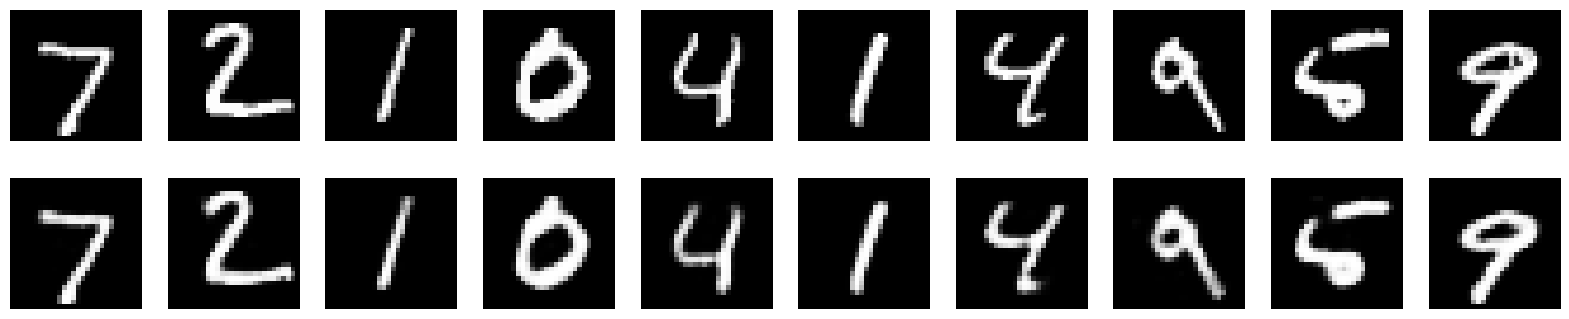

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess the dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the encoder
input_img = tf.keras.Input(shape=(784,))
encoded = layers.Dense(256, activation='relu')(input_img)
z = layers.Dense(64, activation='relu')(encoded)

# Define the decoder
decoded = layers.Dense(256, activation='relu')(z)
output_img = layers.Dense(784, activation='sigmoid')(decoded)

# Build the autoencoder model
autoencoder = models.Model(input_img, output_img)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Test the model
decoded_imgs = autoencoder.predict(x_test)

# Optionally: visualize the results
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')

plt.show()
